In [208]:
import sympy as sp #importing sympy

# Dedining a set of mathematical symbols
vars = sp.symbols('x y m b N')  
x, y,m,b,N = vars

#creating the expression
expr = ((1/(2*N)) * ((y - (m*x+b))**2))

In [209]:
display(expr)

(-b - m*x + y)**2/(2*N)

In [210]:
print(expr.subs({N:1, b:4, m:5})) #subs = subtitution

(-5*x + y - 4)**2/2


In [211]:
print(expr.subs({N:1, y:2, x:3, b:4, m:5}))

289/2


In [212]:
diff = sp.diff(expr, b)  #differentiating with respect to b
display(diff) 

(2*b + 2*m*x - 2*y)/(2*N)

In [213]:
display(diff.simplify())

(b + m*x - y)/N

In [214]:
display(sp.diff(expr, m))

-x*(-b - m*x + y)/N

In [215]:
import numpy as np


X = np.linspace(0, 100, 50)  #generating 50 X between 0 to 100 with uniform difference between each valie
delta = np.random.uniform(-10, 10, X.size) #random delta
Y = 0.5*X + 3 + delta

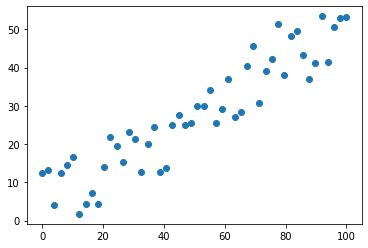

In [216]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

In [217]:
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):
    

    # Defining the error function
    vars = sp.symbols('x y m b N')
    x, y,m,b,N = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*N)) * ((y - (m*x+b))**2))

    #calculating the partial derivatives
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)

    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, int(n_val)):
            b_gradient += error_function_b.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, N:n_val})
            m_gradient += error_function_m.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, N:n_val})

        #update the value for b and m    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
    return [b_val, m_val]

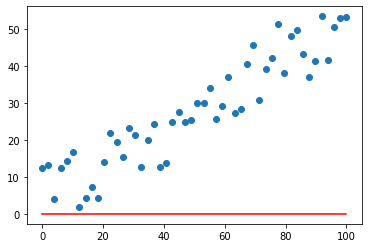

In [218]:
m_val = 0
b_val = 0

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

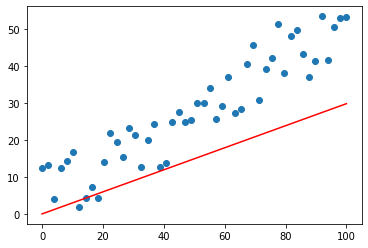

In [219]:
vals = gradient_descent(0, 0, X, Y, .0001, 2)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

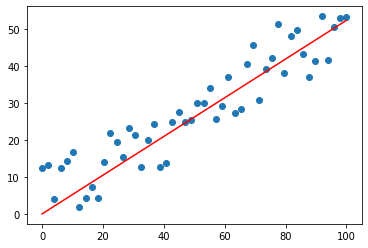

In [220]:
vals = gradient_descent(0, 0, X, Y, .0001, 10)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

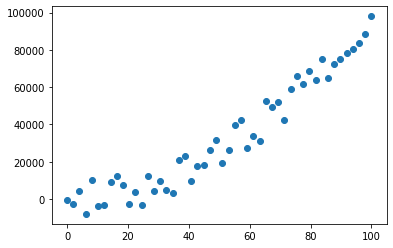

In [221]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 50)
delta = np.random.uniform(-10000, 10000, X.size)
Y = 10*X**2 + 0.5*X + 3 + delta

plt.scatter(X, Y)

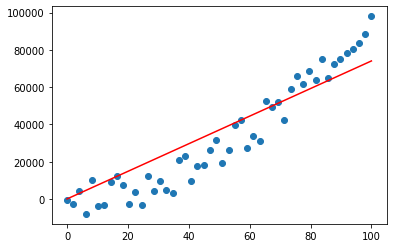

In [222]:
vals = gradient_descent(-5, 5, X, Y, .0001, 20)
m_val = vals[1]
b_val = vals[0]

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

In [223]:
def gradient_descent_poly(b_val, m_val, a_val, x_val, y_val, learning_rate, num_iterations):
    
    # Define x and y as mathematical symbols
    vars = sp.symbols('x y m b n a')
    x, y,m,b,n, a = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (a*(x**2) + m*x+b))**2))
    for j in range(num_iterations):
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        for i in range(0, len(x_val)):
            b_gradient += sp.diff(error_function, b).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            m_gradient += sp.diff(error_function, m).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            a_gradient += sp.diff(error_function, a).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)
        
    return [b_val, m_val, a_val]

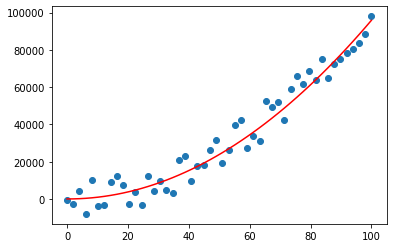

In [224]:
vals = gradient_descent_poly(-5, -5, -5, X, Y, .00000001, 20)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
predictions = [(a_val * X[i]*X[i]) + (m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

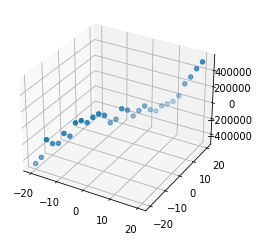

In [225]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.linspace(-20, 20, 30)
Y = np.linspace(-20, 20, 30)
delta = np.random.uniform(-100000,100000,X.size)
Z = 5* X**3+ 18*Y**2 + 2*Y + 50*Y**3 + 4*X + 30 + delta
ax.scatter3D(X, Y, Z, cmap = 'Greens')
  

In [226]:
def gradient_descent_poly_degree_three(b_val, m_val, a_val, c_val, d_val, e_val, x_val, y_val, z_val, learning_rate, num_iterations):
    
    # Define x and y as mathematical symbols
    vars = sp.symbols('x y z m b n a c d e')
    x, y,z , m,b,n, a, c, d, e = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((z - (a*x**3 + c*y**2 + d*x + e*y**3 + m*x+b))**2))
    err_func_b  = sp.diff(error_function, b)
    err_func_m  = sp.diff(error_function, m)
    err_func_a  = sp.diff(error_function, a)
    err_func_c  = sp.diff(error_function, c)
    err_func_d  = sp.diff(error_function, d)
    err_func_e  = sp.diff(error_function, e)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        c_gradient = 0
        d_gradient = 0
        e_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += err_func_b.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            m_gradient += err_func_m.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            a_gradient += err_func_a.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            c_gradient += err_func_c.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            d_gradient += err_func_d.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            e_gradient += err_func_e.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)
        c_val -= (learning_rate * c_gradient)
        d_val -= (learning_rate * d_gradient)
        e_val -= (learning_rate * e_gradient)
        
    return [b_val, m_val, a_val, c_val, d_val, e_val]

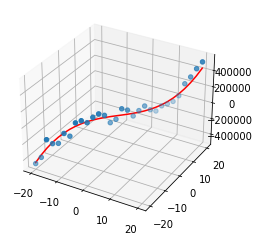

In [227]:
vals = gradient_descent_poly_degree_three(0, 0, 0, 0,0,0, X, Y, Z, .00000001, 10)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
c_val = vals[3]
d_val = vals[4]
e_val = vals[5]

predictions = [a_val * X[i]**3 + c_val * Y[i]**2 + d_val * Y[i] + e_val * Y[i]**3 + m_val * X[i] + b_val for i in range(len(X))]
ax = plt.axes(projection='3d')

ax.scatter3D(X, Y,Z)
ax.plot3D(X, Y, predictions, color='r')

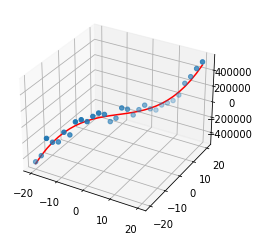

In [228]:
vals = gradient_descent_poly_degree_three(0, 0, 0, 0,0,0, X, Y, Z, .00000001, 20)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
c_val = vals[3]
d_val = vals[4]
e_val = vals[5]

predictions = [a_val * X[i]**3 + c_val * Y[i]**2 + d_val * Y[i] + e_val * Y[i]**3 + m_val * X[i] + b_val for i in range(len(X))]
ax = plt.axes(projection='3d')

ax.scatter3D(X, Y,Z)
ax.plot3D(X, Y, predictions, color='r')

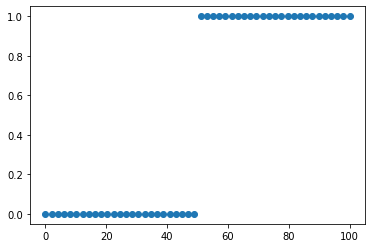

In [229]:
X = np.linspace(0, 100, 50)
Y = np.zeros(X.size)
Y[25:50] = 1
plt.scatter(X, Y)

In [230]:
def gradient_descent_logistic(b_val, m_val, x_val, y_val, learning_rate, num_iterations):
    

    # Defining the error function or the cost function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = -(1/(n)) * ((y * sp.log(1/ (1+(sp.exp(-(m*x+b)))))) + ((1-y) * sp.log(1 - (1/ (1+(sp.exp(-(m*x+b))))))))

    #calculatin partial derivative
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += error_function_b.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})
            m_gradient += error_function_m.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})

        #correcting b and m in an ierative way    
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        
        
    return [b_val, m_val]

0.201941947973358 -9.93236023376079


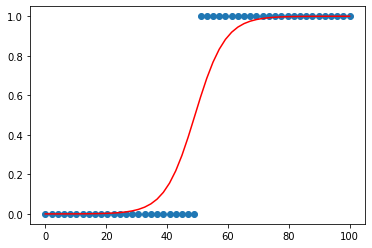

In [231]:
import math
vals = gradient_descent_logistic(-10, -5, X, Y, .01, 20)
m_val = vals[1]
b_val = vals[0]
print(m_val, b_val)
predictions = [1/(1+math.exp(-((m_val * X[i]) + b_val))) for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

In [232]:
import pandas as pd
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [233]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [234]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(xTrain, yTrain)
yPrediction = clf.predict(xTest)
yPrediction

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

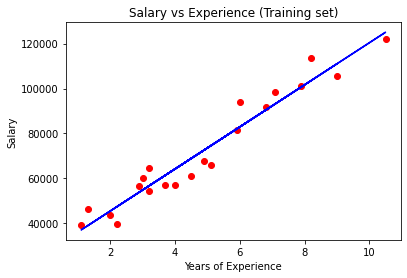

In [235]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, clf.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [237]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [238]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [255]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [256]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


C:\Users\raphe\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [257]:
print( accuracy_score(y_test, predictions))

1.0
